 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [7]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [8]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [9]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [11]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [12]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [15]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype(float)
sp_tsx_history_df.dtypes

/Users/craigbraganza/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [17]:
# Calculate Daily Returns
daily_returns_sp = sp_tsx_history_df.pct_change()
daily_returns_sp.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [18]:
# Drop nulls
daily_returns_sp.dropna(inplace=True)
daily_returns_sp.head()

Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

In [19]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp = daily_returns_sp.rename(columns={
    "Close": "TSX 60 Daily Returns"})
daily_returns_sp.head()

TSX 60 Daily Returns
Date                            
2012-10-02              0.001701
2012-10-03             -0.002563
2012-10-04              0.007137
2012-10-05             -0.002305
2012-10-09             -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns_sp], axis="columns", join="inner")
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  TSX 60 Daily Returns  
Date                                        
2015-03-03 -0.000949             -0.008530  
2015-03-04  0.002416             -0.003371  
2015-03-05  0.004323              0.001344  
2015-03-06 -0.011460             -0.009972  
2015-03-09  0.001303             -0.006555

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Of All Portfolios'}, xlabel='Date'>

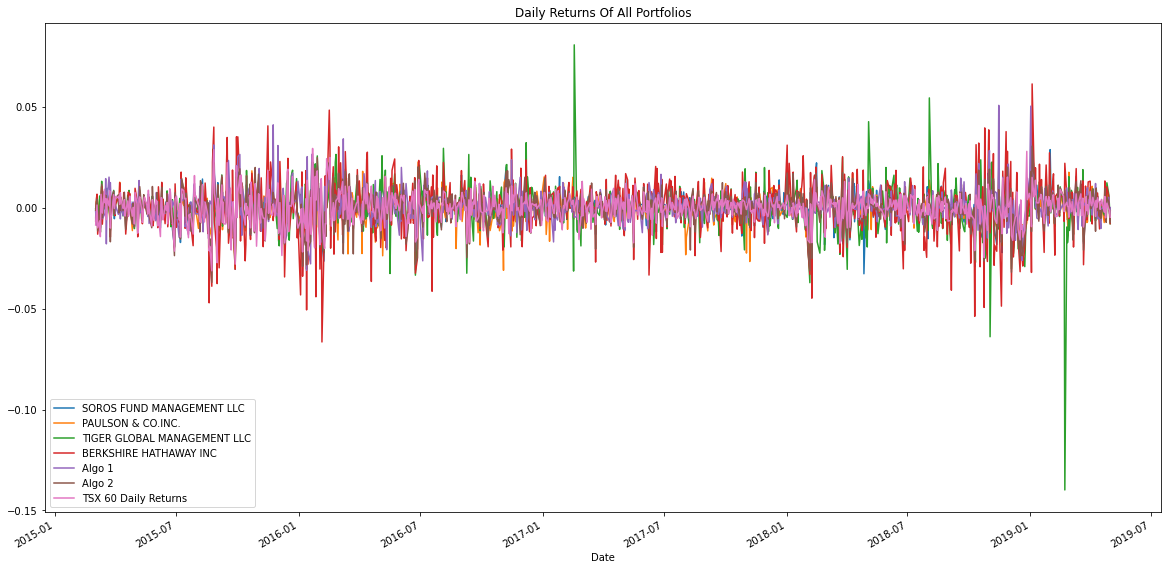

In [21]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns Of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns Of All Portfolios'}, xlabel='Date'>

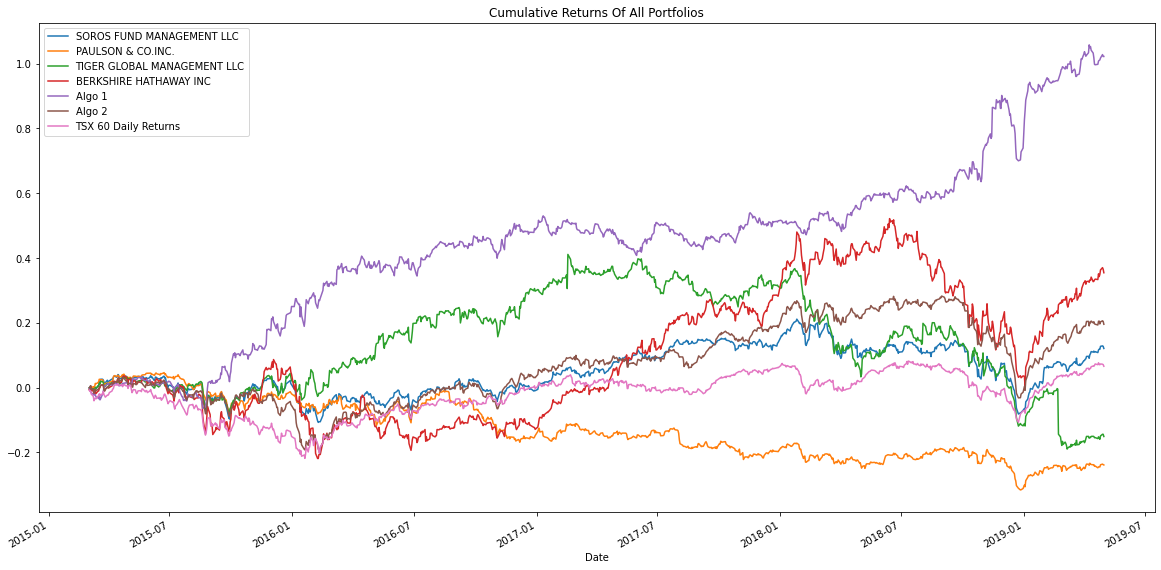

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns Of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

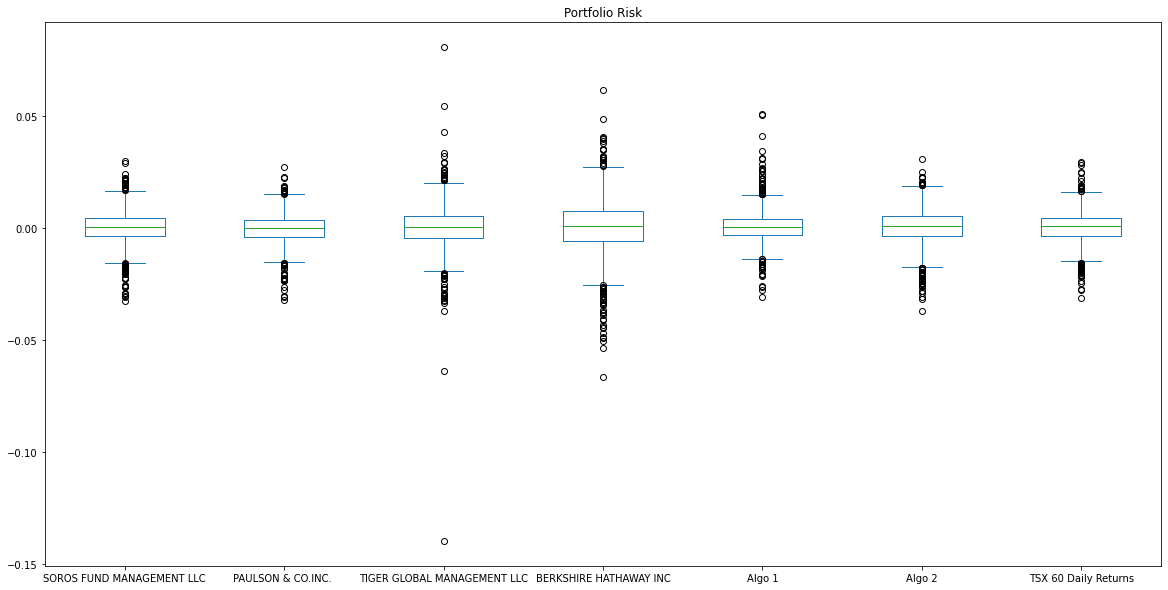

In [23]:
# Box plot to visually show risk
combined_df.plot(kind="box", figsize=(20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
portfolio_risk = combined_df.std()
print(portfolio_risk)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX 60 Daily Returns           0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_history_risk = portfolio_risk[-1]
# Determine which portfolios are riskier than the S&P TSX 60
portfolio_risk.apply(lambda x : True if x> sp_tsx_history_risk else False)

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
TSX 60 Daily Returns           False
dtype: bool

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_portfolio_risk = combined_df.std() * np.sqrt(252)
annual_portfolio_risk

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX 60 Daily Returns           0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation for 21 Days'}, xlabel='Date'>

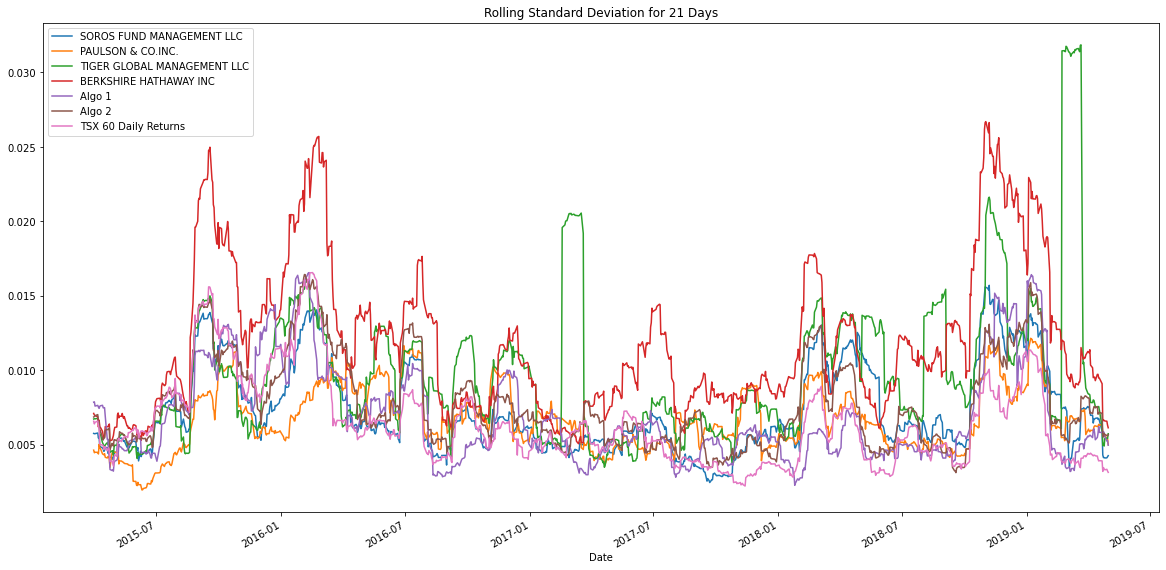

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_dev.plot(figsize=(20,10), title= "Rolling Standard Deviation for 21 Days")

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
price_correlation = combined_df.corr()
# Display de correlation matrix
price_correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
TSX 60 Daily Returns                          0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
TSX 60 Daily Returns                            0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.285455   
Algo 2                                     0.684609  0.285455  1.000000   
TSX 60 Daily Returns                       0.557250  0.310276  0.737370   

                             TSX 60 Daily Returns  
SOROS FUND MANAGEMENT LLC                0.673930  
PAULSON & CO.INC.                        0.486511  
TIGER GLOBAL MANAGEMENT LLC              0.440583  
BERKSHIRE HATHAWAY INC                   0.557250  
Algo 1                                   0.310276  
Algo 2                                   0.737370  
TSX 60 Daily Returns                     1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC Beta'}, xlabel='Date'>

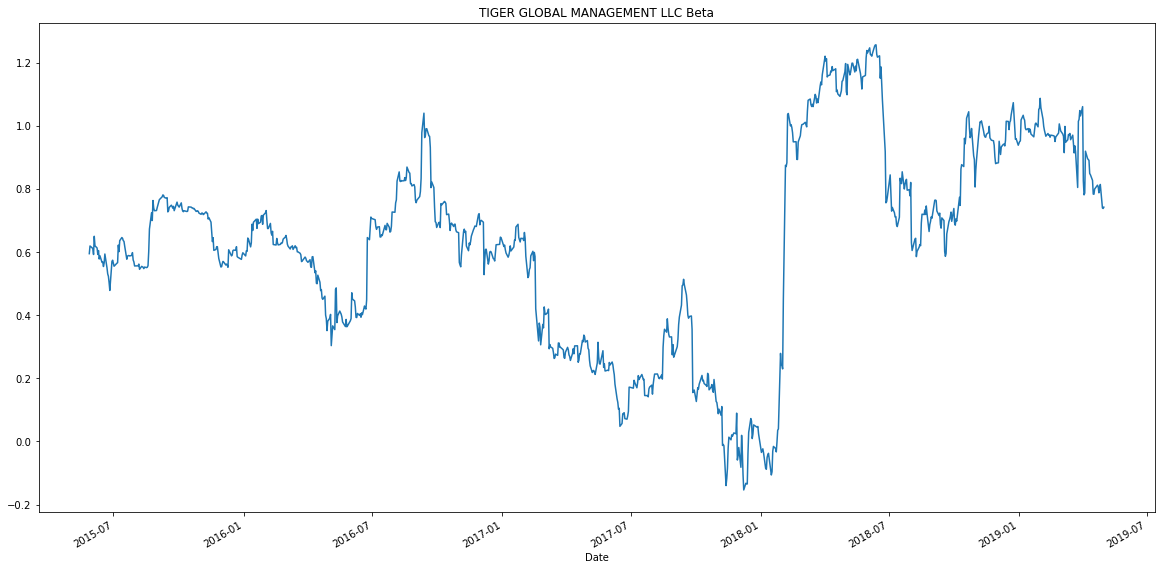

In [29]:
# Calculate covariance of a single portfolio
covariance = combined_df["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_df["TSX 60 Daily Returns"])
# Calculate variance of S&P TSX
variance = combined_df["TSX 60 Daily Returns"].var()
# Computing beta
tiger_beta = covariance / variance
rolling_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['TSX 60 Daily Returns'])
rolling_variance = combined_df['TSX 60 Daily Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='TIGER GLOBAL MANAGEMENT LLC Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window
# Not sure if correct:
combined_df.ewm(halflife=21)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print(sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX 60 Daily Returns           0.195550
dtype: float64


<AxesSubplot:>

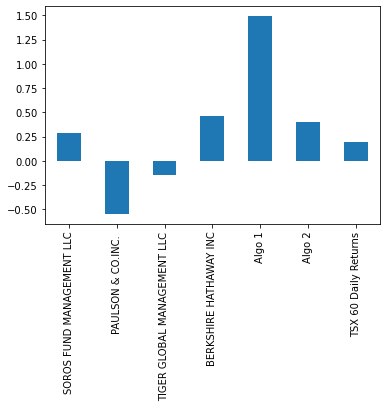

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 outperformed the market and whales portfolios. Algo 2 outperformed all, except Berkshire Hathway Inc.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
# Reading data from 1st stock
shop_historical = Path("Resources/shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_df.head()

Symbol   Close
Date                     
2018-01-02   SHOP  132.06
2018-01-03   SHOP  135.15
2018-01-04   SHOP  137.46
2018-01-05   SHOP  137.26
2018-01-08   SHOP  139.51

In [41]:
# Reading data from 2nd stock
otex_historical = Path("Resources/otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_df.head()

Symbol  Close
Date                    
2018-01-02   OTEX  43.58
2018-01-03   OTEX  43.07
2018-01-04   OTEX  42.91
2018-01-05   OTEX  42.57
2018-01-08   OTEX  42.16

In [42]:
# Reading data from 3rd stock
l_historical = Path("Resources/otex_historical.csv")
l_historical_df = pd.read_csv(l_historical, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_historical_df.head()

Symbol  Close
Date                    
2018-01-02   OTEX  43.58
2018-01-03   OTEX  43.07
2018-01-04   OTEX  42.91
2018-01-05   OTEX  42.57
2018-01-08   OTEX  42.16

In [43]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([shop_historical_df, otex_historical_df, l_historical_df], axis="rows", join="outer")
combined_df.head()

Symbol   Close
Date                     
2018-01-02   SHOP  132.06
2018-01-03   SHOP  135.15
2018-01-04   SHOP  137.46
2018-01-05   SHOP  137.26
2018-01-08   SHOP  139.51

In [44]:
# Reset Date index
combined_df.reset_index()

Date Symbol   Close
0    2018-01-02   SHOP  132.06
1    2018-01-03   SHOP  135.15
2    2018-01-04   SHOP  137.46
3    2018-01-05   SHOP  137.26
4    2018-01-08   SHOP  139.51
...         ...    ...     ...
1498 2019-12-20   OTEX   58.68
1499 2019-12-23   OTEX   57.89
1500 2019-12-24   OTEX   57.44
1501 2019-12-27   OTEX   57.70
1502 2019-12-30   OTEX   57.19

[1503 rows x 3 columns]

In [45]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.pivot(columns="Symbol", values="Close")
#Also tried custom_df = custom_df.pivot_table(columns="Symbol", values="Close")... Canot get any further than error



ValueError: Index contains duplicate entries, cannot reshape

In [39]:
# Calculate daily returns
combined_daily_returns = combined_df.pct_change()

# Drop NAs
combined_daily_returns.dropna(inplace=True)

# Display sample data
combined_daily_returns.head()


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat([combined_df, portfolio_returns], axis="columns", join="inner")


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!